In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random

In [2]:
dataPath = "/home/mario/Programming/MachineLearning/Face Emition Recognition/Face-Emotion-Recognition-/CK+48"

In [3]:
def loadDataSet(dataPath):
    data = []
    imageSize = 48
    for cat in os.listdir(dataPath):
        label = int(cat[:2])
        for i in os.listdir(dataPath+'/'+cat):
            imagePath = dataPath+'/'+cat+'/'+i
            try:
                image = cv2.imread(imagePath,0) 
                image = cv2.resize(image,(imageSize,imageSize))
                data.append([image,label])
            except:
                pass
    
    random.shuffle(data)
    X = [] #image
    Y = [] #labels
    for img,l in data: 
        X.append(img)
        Y.append(l)
    X = np.array(X)
    Y = np.array(Y).reshape(len(Y),1)
    print("Done!!")
    return X,Y

In [4]:
images,labels = loadDataSet(dataPath)
#0 --> Angery
#1 --> Happy
#2 --> sad
#3 --> Surprice

Done!!


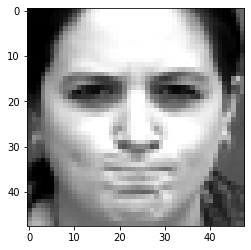

[0]


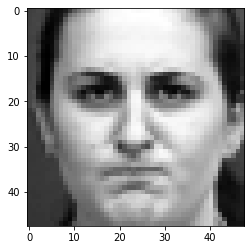

[0]


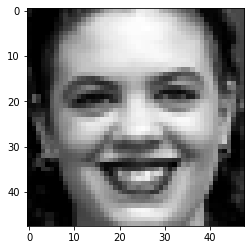

[1]


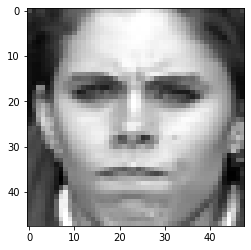

[0]


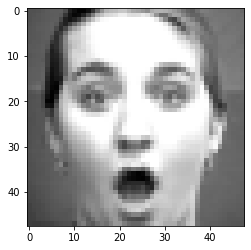

[3]


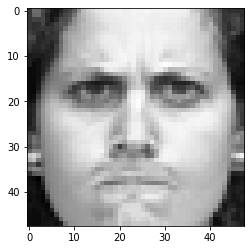

[0]


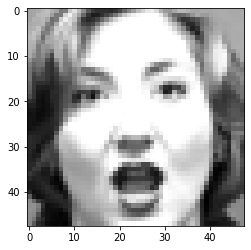

[3]


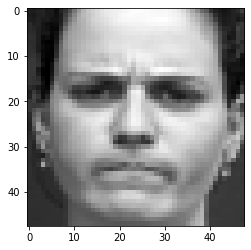

[0]


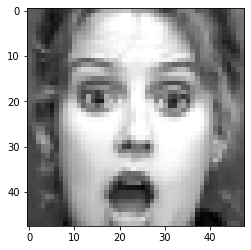

[3]


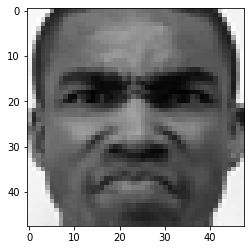

[0]


In [5]:
for i in range(10):
    plt.imshow(images[i],cmap='gray')
    plt.show()
    print(labels[i])

In [6]:
#Compute the mean and Standard Deviation , becouse we need it Later in Normalize the images 
mu=np.mean(images)
std=np.std(images)
print("The Mean=",mu)
print("The Standard Deviation=",std)

The Mean= 130.1001653206929
The Standard Deviation= 74.44157017097706


In [7]:
images.shape

(712, 48, 48)

In [8]:
m = images.shape[0] # 3D Array (number of training images,)
imageShape = images.shape[1:]

In [9]:
#Splitting Data into Training Set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.2,random_state=0)
print("the Number of Training Example=",x_train.shape[0])
print("the Number of Testing Example=",x_test.shape[0])

the Number of Training Example= 569
the Number of Testing Example= 143


In [10]:
imageSize = 48
x_trainNorm = (x_train - mu)/std
x_testNorm  = (x_test - mu)/std
x_trainNorm = x_trainNorm.reshape(x_train.shape[0], imageSize, imageSize,1)
x_testNorm = x_testNorm.reshape(x_test.shape[0], imageSize, imageSize,1)

In [11]:
def preprocessingImage(image = None,imageSize = 48, mu = mu,std = std):
    try:
        image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    except:
        pass
    image = cv2.resize(image,(imageSize,imageSize))
    image = (image - mu) / std
    image = image.reshape(1,imageSize,imageSize,1)
    return image

In [12]:
import tensorflow as tf
from tensorflow import keras

/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mario/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: Futu

In [13]:
class myCallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('accuracy')>0.997):
            self.model.stop_training=True
            
model = keras.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(imageSize,imageSize,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='sigmoid'),
    keras.layers.Dense(4,tf.nn.softmax)
])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               768120    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 4

In [14]:
#Fitting 
model.fit(x_trainNorm,
          y_train,
          epochs = 15,
          callbacks = [myCallBack()])

Epoch 1/15
569/569 [==============================] - 4s 8ms/sample - loss: 0.9949 - accuracy: 0.6186
Epoch 2/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.3813 - accuracy: 0.8787
Epoch 3/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.2175 - accuracy: 0.9156
Epoch 4/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.1373 - accuracy: 0.9561
Epoch 5/15
569/569 [==============================] - 3s 6ms/sample - loss: 0.1096 - accuracy: 0.9754
Epoch 6/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.0755 - accuracy: 0.9859
Epoch 7/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.0522 - accuracy: 0.9912
Epoch 8/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.0494 - accuracy: 0.9877
Epoch 9/15
569/569 [==============================] - 3s 5ms/sample - loss: 0.0380 - accuracy: 0.9982


In [15]:
model.evaluate(x_testNorm,
               y_test,
               verbose = 0)

[0.04815620557776281, 1.0]

In [16]:
model.save('Models/TSModel3')

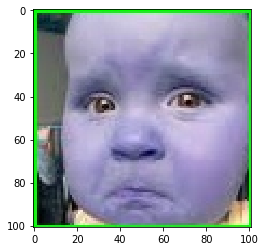

Angry = 9.949805%
Happy = 1.6193571%
Sad = 86.72797%
Surprice = 1.7028682%


In [17]:
model = keras.models.load_model('Models/TSModel3')
dataPath = "/home/mario/Programming/MachineLearning/Face Emition Recognition/Face-Emotion-Recognition-/Testing Images"
im = "15.jpg"
imgPath = dataPath + "/" + im
image = cv2.imread(imgPath,1)
plt.imshow(image)
plt.show()
img = preprocessingImage(image)
pred=model.predict(img)*100 # 4*1

print("Angry = "+str(pred[0][0])+"%")
print("Happy = "+str(pred[0][1])+"%")
print("Sad = "+str(pred[0][2])+"%")
print("Surprice = "+str(pred[0][3])+"%")